## **Intern: Muhammad Osama Ahmed**


## The Sparks Foundation - GRIP


### Data Science & Business Analytics Internship


#### Task 1: Prediction using Supervised Machine Learning

-   Predict the percentage of an student based on the number of study hours.
-   What will be the predicted score if a student studies for 9.25 hrs/day.


#### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


#### Read Data


In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"

# df = pd.read_csv(url)
df = pd.read_csv(r'datasets/student_scores - student_scores.csv')

print("Data imported successfully")

df.head()


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Plot data to see if it's linear


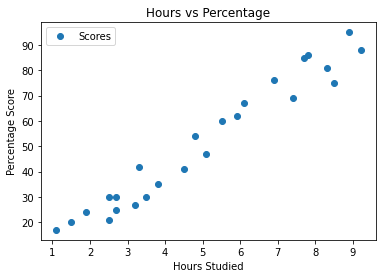

In [3]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**


#### Prepare data


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values


#### Split data into training and testing


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)


#### Train our model


In [6]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")


Training complete.


#### Plotting the regression line on training and testing data


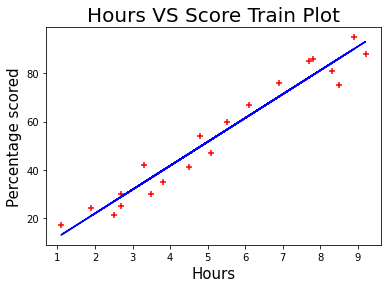

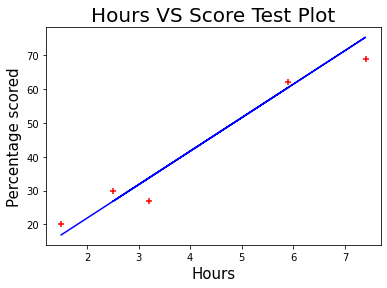

In [7]:
plt.scatter(X_train, y_train, color="red", marker="+")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Hours VS Score Train Plot", size=20)
plt.xlabel("Hours", size=15)
plt.ylabel("Percentage scored", size=15)
plt.show()

plt.scatter(X_test, y_test, color="red", marker="+")
plt.plot(X_test, regressor.predict(X_test), color="blue")
plt.title("Hours VS Score Test Plot", size=20)
plt.xlabel("Hours", size=15)
plt.ylabel("Percentage scored", size=15)
plt.show()


#### Making Predictions


In [8]:
print(X_test)  # Testing data - In Hours
y_pred = regressor.predict(X_test)  # Predicting the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Predict Score for 9.25hrs/Day


In [10]:
# Predicting
hrs = 9.25
prediction = regressor.predict(np.array([[hrs]]))

# Printing the result
prediction
print(f'The score predicted for 9.25 Hours is {prediction[0]}')


The score predicted for 9.25 Hours is 93.69173248737538


#### Evaluate model


In [11]:
# model fitness
from sklearn import metrics
print('Score for Training data = ', regressor.score(X_train, y_train))
print('Score for Test data =', regressor.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))


Score for Training data =  0.9515510725211552
Score for Test data = 0.9454906892105356
Mean Absolute Error: 4.183859899002975
